Pip Installing Packages

In [ ]:
pip install Numpy
pip install MatPlotLib
pip install Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import numpy
import matplotlib.pyplot as plt
from tensorflow import keras

Import MNIST

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Look at data

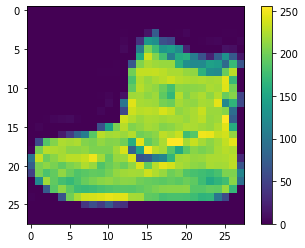

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocessing the dataset
The greyscale assigned to each pixel within an image has a value range of 0-255. We will want to flatten (smoosh… scale…) this range to 0-1. To achieve this flattening, we will exploit the data structure that our images are stored in, arrays.  You see, each image is stored as a 2-dimensional array where each numerical value in the array is the greyscale code of particular pixel. Conveniently, if we divide an entire array by a scalar we generate a new array whose elements are the original elements divided by the scalar.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Model Generation

In [7]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])

Softmax activation not only flattens each value (between 0 and 1) but also scales everything to add up to 1.

Training the Model

In [8]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Now we can begin training our model! Now, with already having generated and compiled the model, the code required to train the model is a single line

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4995 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3386 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3178 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8913


This single line completes the entire job of training our model, but let's take a brief look at the arguments provided to the model.fit command.

1. The first argument is input data, and recall that our input Flatten layer takes a (28,28) array, conforming to the dimensionality of our images.
2. Next we train the system by providing the correct classification for all the training examples.
3. The final argument is the number of epochs undertaken during training; each epoch is a training cycle over all the training data. Our setting the epoch value to 5 means that the model will be trained overall 60,000 training examples 5 times. After each epoch, we get both the value of the loss function and the model's accuracy (88.97% after epoch 5) at this epoch.



Evaluating Our Model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8738


In [11]:
print(test_acc)

0.8737999796867371


This is great! Our model performs at an accuracy of 87.21%. As good as that is, it is lower than the model accuracy promised above (89.01%). This lower performance is due to the model overfitting on the training data. Overfitting occurs when there are too many parameters within the model when compared to the number of training instances; this allows the model to over learn on those limited examples. Overfitting leads to better model performance over non-training data.

That said, 87.21% is a decent number! Let's finally learn how you can feed our model the series of test examples from the test_images array, and have it provide its predictions.

In [12]:
predictions = model.predict(test_images)
predictions[0]

array([1.0093708e-05, 1.0996472e-08, 7.3024705e-07, 9.2547360e-08,
       3.8851391e-07, 7.9841455e-03, 3.2762316e-06, 4.6496969e-02,
       4.7647845e-06, 9.4549954e-01], dtype=float32)

As we can see, most of the entries in our prediction array are very close to 0. They are written in scientific notation--the value after the e being the number decimal places to adjust the value (for example 5.1 e-04 is actually 0.00051). The entry that stands out is predictions[0][9] at .8658, or 86.58%, certainty that this image should be classified as a boot!

If you prefer to not look through a list to determine the class label, we can simplify the output by:

In [13]:
numpy.argmax(predictions[0])

9

Finally, we can verify this prediction by looking at the label ourselves:

In [15]:
test_labels[0]

9

In the prediction array generated by our model:

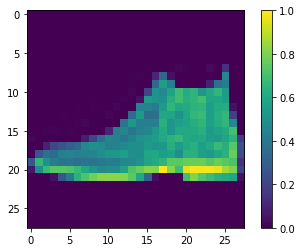

In [16]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()